In [18]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd

M_Z = 91.187  # mass of Z boson (GeV)

In [19]:
sm = pd.read_csv("./data/SM_10k.csv")
o1 = pd.read_csv("./data/cHDD_1_10k.csv")
o2 = pd.read_csv("./data/cHDD_2_10k.csv")
# Apply cuts
sm = sm[
    (abs(sm["m_ll"] - M_Z) < 15) & (sm["m_jj"] > 300) & (abs(sm["delta_eta_jj"]) > 2.5)
]
o1 = o1[
    (abs(o1["m_ll"] - M_Z) < 15) & (o1["m_jj"] > 300) & (abs(o1["delta_eta_jj"]) > 2.5)
]
o2 = o2[
    (abs(o2["m_ll"] - M_Z) < 15) & (o2["m_jj"] > 300) & (abs(o2["delta_eta_jj"]) > 2.5)
]

selection = [
    "m_ll",
    "m_jj",
    "pt_l1",
    "pt_l2",
    "pt_j1",
    "pt_j2",
    "pt_ll",
    "eta_l1",
    "eta_l2",
    "eta_j1",
    "eta_j2",
    "delta_eta_jj",
    "delta_phi_jj",
]
sm_w = sm["cross_section_weight"]
o1_w = o1["cross_section_weight"]
o2_w = o2["cross_section_weight"]

# Log variables
for vars in ["m_ll", "m_jj", "pt_l1", "pt_l2", "pt_j1", "pt_j2", "pt_ll"]:
    sm[vars] = sm[vars].apply(np.log10)
    o1[vars] = o1[vars].apply(np.log10)
    o2[vars] = o2[vars].apply(np.log10)

sm = sm[selection]
o1 = o1[selection]
o2 = o2[selection]

(array([  6.42250132,   7.3547999 ,   9.99631254,  16.78137442,
         52.15692606, 165.7419696 ,  34.33966433,   9.53016325,
          5.80096894,   4.14354924]),
 array([1.88194711, 1.89634406, 1.910741  , 1.92513795, 1.9395349 ,
        1.95393184, 1.96832879, 1.98272574, 1.99712268, 2.01151963,
        2.02591658]),
 [<matplotlib.patches.Polygon at 0x7ff5a54427b0>])

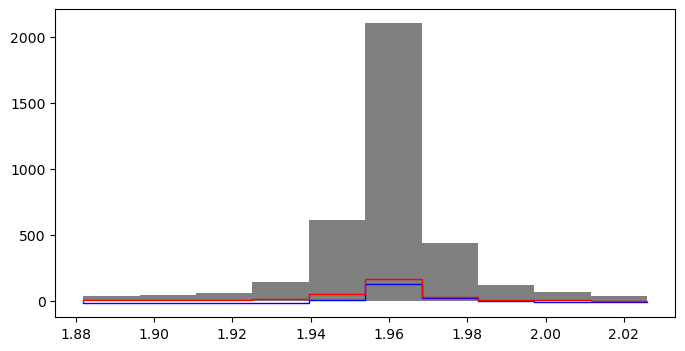

In [20]:
n_bins = 10
ci = 3
var = "m_ll"
r__ = [
    min(np.min(sm[var]), np.min(o1[var]), np.min(o2[var])),
    max(np.max(sm[var]), np.max(o1[var]), np.max(o2[var])),
]
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.hist(sm[var], weights=sm_w, bins=n_bins, color="gray", range=r__)
ax.hist(
    o1[var], weights=ci * o1_w, bins=n_bins, color="blue", histtype="step", range=r__
)
ax.hist(
    o2[var], weights=ci**2 * o2_w, bins=n_bins, color="red", histtype="step", range=r__
)

In [21]:
nbins = 200
var = "delta_phi_jj"
r__ = [
    min(np.min(sm[var]), np.min(o1[var]), np.min(o2[var])),
    max(np.max(sm[var]), np.max(o1[var]), np.max(o2[var])),
]
sm_h, _ = np.histogram(sm[var], nbins, weights=sm_w, range=r__)
lin_h, _ = np.histogram(o1[var], nbins, weights=o1_w, range=r__)
quad_h, _ = np.histogram(o2[var], nbins, weights=o2_w, range=r__)
c = np.linspace(-5, 2, 100)
chi = [sum((sm_h - (sm_h + (ci) * lin_h + (ci**2) * quad_h)) ** 2) for ci in c]

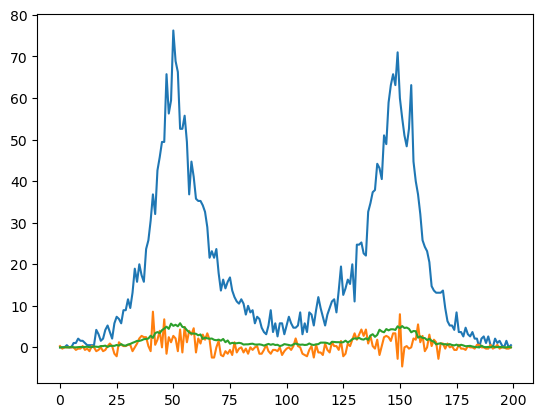

In [22]:
plt.plot(sm_h)
plt.plot(3 * lin_h)
plt.plot(9 * quad_h)

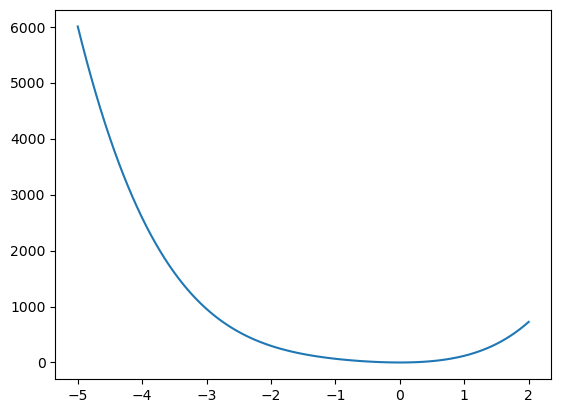

In [23]:
plt.plot(c, chi)

In [48]:
nbins = 20
chi = []
eps = 1e-2
c = np.linspace(-3, 3, 100)
selection = [
    "m_ll",
    "m_jj",
    "pt_l1",
    "pt_j1",
    "pt_ll",
    "eta_l1",
    "eta_j1",
    "delta_phi_jj",
]
for var in selection:
    r__ = [
        np.min(sm[var]),
        np.max(sm[var]),
    ]
    sm_h, _ = np.histogram(sm[var], nbins, weights=sm_w, range=r__)
    lin_h, _ = np.histogram(o1[var], nbins, weights=o1_w, range=r__)
    quad_h, _ = np.histogram(o2[var], nbins, weights=o2_w, range=r__)

    chi.append(
        [sum((sm_h - (sm_h + (ci) * lin_h + (ci**2) * quad_h)) ** 2 / sm_h) for ci in c]
    )

(0.0, 50.0)

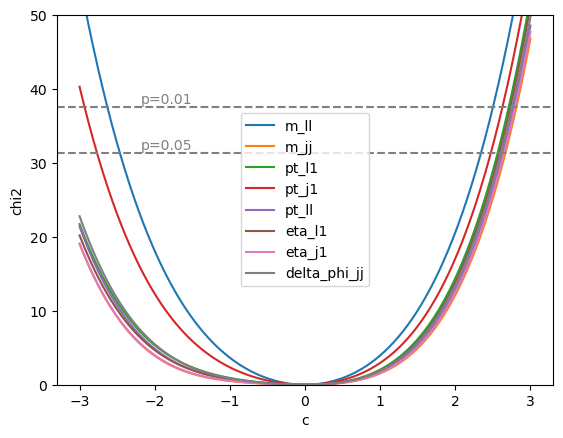

In [57]:
for i in range(len(selection)):
    plt.plot(c, chi[i], label=selection[i])

plt.legend()
plt.xlabel("c")
plt.ylabel("chi2")
plt.axhline(y=31.410, color="gray", linestyle="--")
plt.text(
    x=-1.5,
    y=31.410,
    s="p=0.05",
    color="grey",
    va="bottom",
    ha="right",
)
plt.axhline(y=37.566, color="gray", linestyle="--")
plt.text(
    x=-1.5,
    y=37.566,
    s="p=0.01",
    color="grey",
    va="bottom",
    ha="right",
)
plt.ylim(0, 50)